In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("memmap_results.csv",sep=",",header=0)
df.head()

,function,matrix,time
0,svd_numpy_naive,rd_3x1,0.021781
1,svd_numpy_naive,rd_30x10,0.018254
2,svd_numpy_naive,rd_300x100,0.057245
3,svd_numpy_naive,rd_3000x1000,3.323175
4,svd_numpy_naive,rd_30000x10000,557.607689


In [3]:
np_memmap_result = []
for i in range(5):
    dim_str = df["matrix"][i].split("_")[-1]
    dim = tuple(map(lambda x : int(x),dim_str.split("x")))

    np_memmap_result.append((dim, df["time"][i]))
np_memmap_result


[((3, 1), 0.0217810216665839),
 ((30, 10), 0.0182544710000532),
 ((300, 100), 0.0572447336666831),
 ((3000, 1000), 3.323175254999986),
 ((30000, 10000), 557.6076892753332)]

In [4]:

matrix_size = np.array([np_memmap_result[i][0][0] * np_memmap_result[i][0][1] for i in range(len(np_memmap_result))])/3
time_val = [np_memmap_result[i][1] for i in range(len(np_memmap_result))]
print(matrix_size)
print(time_val)

[1.e+00 1.e+02 1.e+04 1.e+06 1.e+08]
[0.0217810216665839, 0.0182544710000532, 0.0572447336666831, 3.323175254999986, 557.6076892753332]


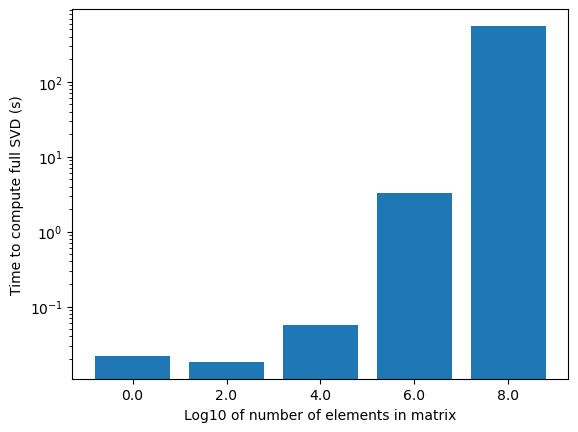

In [5]:
fig, ax = plt.subplots()
x = [i for i in range(5)]
ax.bar(x,time_val)
ax.set_xticks(x, np.log10(matrix_size))

ax.set_ylabel("Time to compute full SVD (s)")
ax.set_xlabel( "Log10 of number of elements in matrix")
ax.set_yscale( 'log')


plt.show()


In [3]:
df0 = pd.read_csv("results_P_Desktop.csv",sep=",",header=0)
df0.head(15)


,function,matrix,time
0,svd_dask,random_3GB,365.034998
1,svd_sklearn,random_3GB,84.992340
2,svd_dask,random_6GB,773.571999
3,svd_sklearn,random_6GB,173.178962
4,svd_sklearn,random1Go,198.461731
5,svd_dask,petite,0.098031
6,svd_sklearn,petite,0.027834
7,svd_dask,random1Go,380.063176


In [4]:
dict_size = {'petite': (1000,100),'random1Go':(25000,5000),
              'random_3GB':(200000,2000),
              'random_6GB':(400000, 2000)}
matrix_elts = {key : dict_size[key][0]*dict_size[key][1] for key in dict_size.keys()}
matrix_elts

{'petite': 100000,
 'random1Go': 125000000,
 'random_3GB': 400000000,
 'random_6GB': 800000000}

In [5]:
func_names = list(set(df0["function"]))
func_names

['svd_dask', 'svd_sklearn']

In [6]:
dict(df0)["function"][5]

'svd_dask'

In [7]:
# Dask
dask_res = {}
scikit_res = {}
dict_0 = dict(df0)
for i in range(df0.shape[0]):
     if dict_0["function"][i] == 'svd_dask':
          dask_res.update({dict_0["matrix"][i]:dict_0["time"][i]})
     if dict_0["function"][i] == 'svd_sklearn':
          scikit_res.update({dict_0["matrix"][i]:dict_0["time"][i]})


dask_plot = np.sort(np.array([ [matrix_elts[key],dask_res[key]] for key in dask_res.keys()]),axis=0)
sklearn_plot = np.sort(np.array([ [matrix_elts[key],scikit_res[key]] for key in scikit_res.keys()]),axis=0)

print(dask_plot)
print(sklearn_plot)



[[1.00000000e+05 9.80311774e-02]
 [1.25000000e+08 3.65034998e+02]
 [4.00000000e+08 3.80063176e+02]
 [8.00000000e+08 7.73571999e+02]]
[[1.00000000e+05 2.78340996e-02]
 [1.25000000e+08 8.49923401e+01]
 [4.00000000e+08 1.73178962e+02]
 [8.00000000e+08 1.98461731e+02]]


In [8]:
x_labels = [np.format_float_scientific(x,precision=2) for x in  sklearn_plot[:,0]]
x_labels

['1.e+05', '1.25e+08', '4.e+08', '8.e+08']

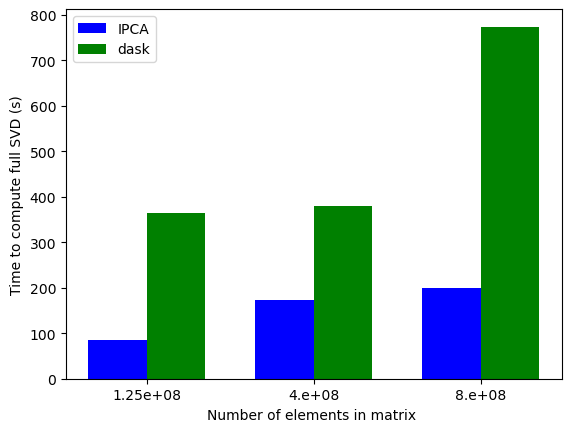

In [10]:
fig, ax = plt.subplots()
width = 0.35
x = np.arange(3)

ax.set_xticks(x, x_labels[1:])


ax.bar(x - width/2,sklearn_plot[1:,1],width,color='b', label="IPCA")
ax.bar(x + width/2,dask_plot[1:,1],width, color= 'g',label="dask")

ax.set_ylabel("Time to compute full SVD (s)")
ax.set_xlabel( "Number of elements in matrix ")
#ax.set_yscale( 'log')

plt.legend()


plt.show()

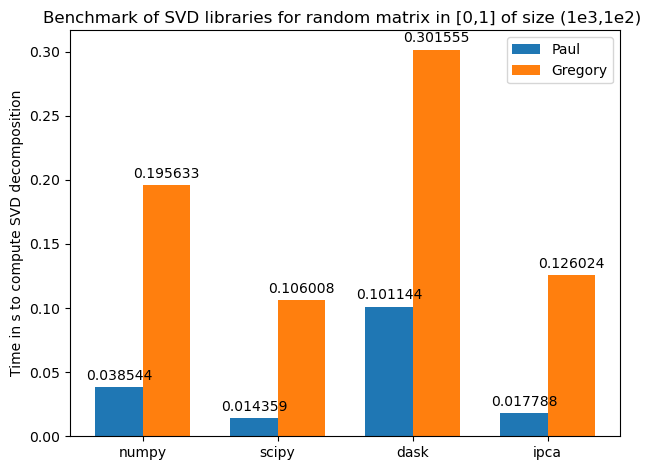

In [30]:
# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()

# rects1 = ax.bar(x - width/2, paul_values, width, label='Paul')
# rects2 = ax.bar(x + width/2, gregory_values, width, label='Gregory')

# ax.set_ylabel('Time in s to compute SVD decomposition')
# ax.set_title("Benchmark of SVD libraries for random matrix in [0,1] of size (1e3,1e2) ")
# ax.set_xticks(x, labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()